In [1]:
pip install autorank

  Using cached autorank-1.1.2-py3-none-any.whl (33 kB)
  Using cached baycomp-1.0.2-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [3]:
def processHistoryData(dir):
    df = pd.DataFrame()
    for filename in os.listdir(dir):
        filepath = os.path.join(dir, filename)
        if(filepath.endswith("json")):
            with open(filepath) as json_data:
                data = json.load(json_data)
                jobId = data['jobId']
                provDuration = data["provDuration"]/1000

        dh = pd.DataFrame(data['deplHistory'])
        dh = dh[dh.entName == "HadoopCluster"]
        dh = dh[["deplDuration", "confDuration", "startDuration"]]
        dh = dh.transform(lambda x: x/1000)
        dh['jobId'] = jobId
        dh = dh.rename(columns={"deplDuration": "Deploy", "confDuration":"Configure", "startDuration":"Start"})
        
        
        ph = pd.DataFrame(data['provHistory'])
        ph_max = ph.duration.max() / 1000
        ph['provDuration'] = ph_max
        print(ph_max)
        ph = ph[["provDuration"]]
        d = {"jobId": jobId, "Provisioning": provDuration, "Overall": data["duration"]/1000}
        duration = pd.DataFrame([d])
        
        merge = (pd.merge(duration, dh))
        df = df.append(merge, ignore_index = True)
        df = df.set_index('jobId')
    return df

def calcCI(df):
    result = autorank(df, alpha=0.05, verbose=True)
    if not "mean" in result.rankdf.columns:
        result.rankdf["mean"] = df.mean()
    return result.rankdf[["mean","ci_lower","ci_upper"]]

def createBoxPlot(ciDf, dir):
    fig = plt.figure()
    for mean,lower,upper,y in zip(ciDf['mean'], ciDf['ci_lower'],ciDf['ci_upper'],range(len(ciDf))):
        plt.plot((y,y),(lower,upper),'-_',color='grey',linewidth=1)
        plt.plot(y, mean, '.', color='black')
    plt.xticks(range(len(ciDf)),list(ciDf.index))
    plt.ylabel("Duration in s")
    fig.savefig(dir +".pdf")
    return fig
    
def analysisWrapper(dir):
    print("Performing Analysis for Case Study: " + dir)
    tmp_df = processHistoryData(dir)
    print(tmp_df)
    tmp_ciDf = calcCI(tmp_df)
    tmp_ciDf = tmp_ciDf.reindex(["Overall", "Provisioning", "Deploy", "Configure", "Start"])
    fig = createBoxPlot(tmp_ciDf, dir)
    return tmp_ciDf

Performing Analysis for Case Study: cloudhistory
85.452
55.96


/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

55.785
57.766
59.172
                   Provisioning  Overall   Deploy  Configure   Start
jobId                                                               
NaN                      87.796  275.118  145.397     13.934  27.906
NaN                      61.539  247.967  144.899     13.783  27.691
NaN                      58.410  249.082  149.029     13.780  27.822
NaN                      63.576  247.331  142.326     13.744  27.633
job_1637071705349        64.226  248.366  142.517     13.795  27.769
Fail to reject null hypothesis that data is normal for column Provisioning (p=0.020619>=0.010000)
Rejecting null hypothesis that data is normal for column Overall (p=0.000695<0.010000)
Fail to reject null hypothesis that data is normal for column Deploy (p=0.392297>=0.010000)
Fail to reject null hypothesis that data is normal for column Configure (p=0.058651>=0.010000)
Fail to reject null hypothesis that data is normal for column Start (p=0.963754>=0.010000)
Using Levene's test for homosceda

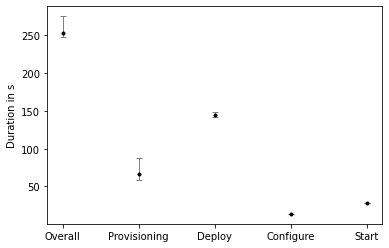

In [4]:
ch = analysisWrapper("cloudhistory")

Performing Analysis for Case Study: statehistory
3.036
0.176
0.157
0.139
2.057


/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

                   Provisioning  Overall  Deploy  Configure  Start
jobId                                                             
NaN                       3.454    4.640   0.045      0.025  0.019
NaN                       0.516    1.669   0.029      0.024  0.016
NaN                       0.377    1.554   0.038      0.041  0.024
NaN                       0.301    1.418   0.026      0.022  0.013
job_1637145421311         2.262    3.377   0.033      0.013  0.011
Fail to reject null hypothesis that data is normal for column Provisioning (p=0.104056>=0.010000)
Fail to reject null hypothesis that data is normal for column Overall (p=0.122524>=0.010000)
Fail to reject null hypothesis that data is normal for column Deploy (p=0.847910>=0.010000)
Fail to reject null hypothesis that data is normal for column Configure (p=0.477959>=0.010000)
Fail to reject null hypothesis that data is normal for column Start (p=0.858743>=0.010000)
Using Bartlett's test for homoscedacity of normally distribute

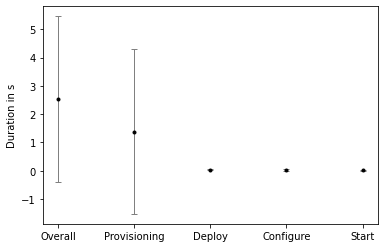

In [5]:
sh = analysisWrapper("statehistory")

Performing Analysis for Case Study: deplhistory
3.494
1.901
1.79
1.88
1.984
                   Provisioning  Overall   Deploy  Configure   Start
jobId                                                               
NaN                       3.783  124.966   89.876     10.580  17.538
NaN                       2.154  124.290   88.313     12.936  17.736
NaN                       1.956  130.552   97.273     10.322  17.569
NaN                       1.996  156.433  121.218     10.926  18.560
job_1637147145503         2.074  128.059   92.609     11.416  18.339
Rejecting null hypothesis that data is normal for column Provisioning (p=0.002196<0.010000)
Fail to reject null hypothesis that data is normal for column Overall (p=0.014170>=0.010000)
Fail to reject null hypothesis that data is normal for column Deploy (p=0.043512>=0.010000)
Fail to reject null hypothesis that data is normal for column Configure (p=0.299028>=0.010000)
Fail to reject null hypothesis that data is normal for column Start (

/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(merge, ignore_index = True)
/tmp/ipykernel_94/3777761258.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

Rejecting null hypothesis that there is no difference between the distributions (p=0.000499)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.


mean ci_lower ci_upper
Overall       132.8600   124.29  156.433
Provisioning    2.3926    1.956    3.783
Deploy         97.8578   88.313  121.218
Configure      11.2360   10.322   12.936
Start          17.9484   17.538    18.56

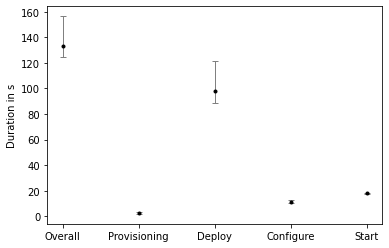

In [6]:
dh = analysisWrapper("deplhistory")
dh

/tmp/ipykernel_94/2099020710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h["Environment"] = "Cloud Environment"
/tmp/ipykernel_94/2099020710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh["Environment"] = "Deployment Simulation"
/tmp/ipykernel_94/2099020710.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h = h.append(sh, ignore_index=True)
/tmp/ipykernel_94/2099020710.py:8: FutureWarning: The frame.a

mean  ci_lower  ci_upper
Environment                                         
Cloud Environment       253.5728   247.331   275.118
State-based Simulation    2.5316 -0.398417  5.461617
Deployment Simulation   132.8600    124.29   156.433

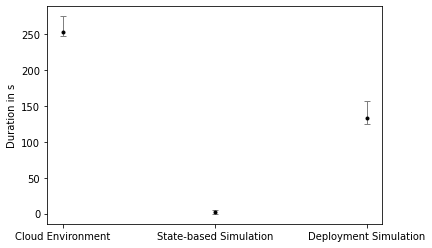

In [7]:
h = ch[ch.index == "Overall"]
h["Environment"] = "Cloud Environment"
sh = sh[sh.index == "Overall"]
sh["Environment"] = "State-based Simulation"
dh = dh[dh.index == "Overall"]
dh["Environment"] = "Deployment Simulation"
h = h.append(sh, ignore_index=True)
h = h.append(dh, ignore_index=True)

h = h.set_index("Environment")
fig = createBoxPlot(h, "all")
h

In [86]:
pLinks = {"urn:uuid:89e649f8-5f4b-4a6f-a298-7ffd82934753","urn:uuid:ff292f08-d263-41b6-88c8-84d33783b917","urn:uuid:ff292f08-d263-41b6-88c8-84d33783b928"}
cLinks = {"urn:uuid:0a38e3bc-60b7-4421-9aeb-1ee636c21d65","urn:uuid:9aa31c50-c605-4370-aa60-2c7c461051ef","urn:uuid:e38a8c76-b5cc-4969-b314-e2214e0f2120","urn:uuid:9af93ea3-346c-439e-9073-fd9df9dcd182","urn:uuid:7890f02b-6f56-4809-865f-d8c686fd9da1"}
compute = {"urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166cf","urn:uuid:e8b9eeff-9da8-47b3-bc09-5cb70bb2567f","urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166ce"}
application = {"urn:uuid:a4888ba9-a0ea-48f2-a29e-901c876ab42d"}


def extractMeanTypeDuration(list, dir):
    meanList = []
    for filename in os.listdir(dir):
        filepath = os.path.join(dir, filename)
        if(filepath.endswith("json")):
            print(filepath)
            with open(filepath) as json_data:
                data = json.load(json_data)
                sum = 0;
                for d in data["provHistory"]:
                    if d["entId"] in list:
                        print(d["entId"],":", d["duration"])
                        sum += d["duration"]
                meanOfOneExecution = sum/len(list)
                print("Mean:",meanOfOneExecution)
                meanList.append(meanOfOneExecution)
    return meanList

def meanOfList(list):
    sum = 0
    for i in list:
        sum += i
    return sum/len(list)

In [89]:
def extractDeplDuration(list, dir):
    meanList = []
    for filename in os.listdir(dir):
        filepath = os.path.join(dir, filename)
        if(filepath.endswith("json")):
            print(filepath)
            with open(filepath) as json_data:
                data = json.load(json_data)
                sum = 0;
                for d in data["deplHistory"]:
                        print(d["entId"],":", d["duration"])
                        sum += d["duration"]
                meanOfOneExecution = sum/len(list)
                print("Mean:",meanOfOneExecution)
                meanList.append(meanOfOneExecution)
    return meanList

placementDuration = extractDeplDuration(application, "cloudhistory")

meanOfList(placementDuration)/1000

cloudhistory/job1.json
urn:uuid:a4888ba9-a0ea-48f2-a29e-901c876ab42d : 187237
Mean: 187237.0
cloudhistory/job2.json
urn:uuid:a4888ba9-a0ea-48f2-a29e-901c876ab42d : 186373
Mean: 186373.0
cloudhistory/job3.json
urn:uuid:a4888ba9-a0ea-48f2-a29e-901c876ab42d : 190631
Mean: 190631.0
cloudhistory/job4.json
urn:uuid:a4888ba9-a0ea-48f2-a29e-901c876ab42d : 183703
Mean: 183703.0
cloudhistory/job5.json
urn:uuid:a4888ba9-a0ea-48f2-a29e-901c876ab42d : 184081
Mean: 184081.0


186.405

In [70]:
print("PlacementLink Duration Mean:")
placementDuration = extractMeanTypeDuration(pLinks, "cloudhistory")
print(placementDuration)
print(meanOfList(placementDuration))

PlacementLink Duration Mean:
cloudhistory/job1.json
urn:uuid:89e649f8-5f4b-4a6f-a298-7ffd82934753 : 15
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b917 : 11
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b928 : 13
Mean: 13.0
cloudhistory/job2.json
urn:uuid:89e649f8-5f4b-4a6f-a298-7ffd82934753 : 7
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b917 : 21
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b928 : 9
Mean: 12.333333333333334
cloudhistory/job3.json
urn:uuid:89e649f8-5f4b-4a6f-a298-7ffd82934753 : 16
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b917 : 20
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b928 : 36
Mean: 24.0
cloudhistory/job4.json
urn:uuid:89e649f8-5f4b-4a6f-a298-7ffd82934753 : 14
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b917 : 12
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b928 : 8
Mean: 11.333333333333334
cloudhistory/job5.json
urn:uuid:89e649f8-5f4b-4a6f-a298-7ffd82934753 : 12
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b917 : 6
urn:uuid:ff292f08-d263-41b6-88c8-84d33783b928 : 16
Mean: 11.33333333333333

In [71]:
print("ComponentLink Duration Mean:")
componentLinkDuration = extractMeanTypeDuration(cLinks, "cloudhistory")
print(componentLinkDuration)
print(meanOfList(componentLinkDuration))

ComponentLink Duration Mean:
cloudhistory/job1.json
urn:uuid:9af93ea3-346c-439e-9073-fd9df9dcd182 : 12
urn:uuid:7890f02b-6f56-4809-865f-d8c686fd9da1 : 17
urn:uuid:0a38e3bc-60b7-4421-9aeb-1ee636c21d65 : 32
urn:uuid:9aa31c50-c605-4370-aa60-2c7c461051ef : 18
urn:uuid:e38a8c76-b5cc-4969-b314-e2214e0f2120 : 28
Mean: 21.4
cloudhistory/job2.json
urn:uuid:9af93ea3-346c-439e-9073-fd9df9dcd182 : 20
urn:uuid:7890f02b-6f56-4809-865f-d8c686fd9da1 : 21
urn:uuid:0a38e3bc-60b7-4421-9aeb-1ee636c21d65 : 61
urn:uuid:9aa31c50-c605-4370-aa60-2c7c461051ef : 45
urn:uuid:e38a8c76-b5cc-4969-b314-e2214e0f2120 : 61
Mean: 41.6
cloudhistory/job3.json
urn:uuid:9af93ea3-346c-439e-9073-fd9df9dcd182 : 34
urn:uuid:7890f02b-6f56-4809-865f-d8c686fd9da1 : 52
urn:uuid:0a38e3bc-60b7-4421-9aeb-1ee636c21d65 : 30
urn:uuid:9aa31c50-c605-4370-aa60-2c7c461051ef : 56
urn:uuid:e38a8c76-b5cc-4969-b314-e2214e0f2120 : 44
Mean: 43.2
cloudhistory/job4.json
urn:uuid:9af93ea3-346c-439e-9073-fd9df9dcd182 : 22
urn:uuid:7890f02b-6f56-4809-86

In [74]:
print("Compute Duration Mean:")
computeDuration = extractMeanTypeDuration(compute, "cloudhistory")
print(computeDuration)
print(meanOfList(computeDuration)/1000)

Compute Duration Mean:
cloudhistory/job1.json
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166cf : 85452
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166ce : 75626
urn:uuid:e8b9eeff-9da8-47b3-bc09-5cb70bb2567f : 74012
Mean: 78363.33333333333
cloudhistory/job2.json
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166cf : 55960
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166ce : 54167
urn:uuid:e8b9eeff-9da8-47b3-bc09-5cb70bb2567f : 53246
Mean: 54457.666666666664
cloudhistory/job3.json
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166cf : 50352
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166ce : 55785
urn:uuid:e8b9eeff-9da8-47b3-bc09-5cb70bb2567f : 48334
Mean: 51490.333333333336
cloudhistory/job4.json
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166cf : 55984
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166ce : 55539
urn:uuid:e8b9eeff-9da8-47b3-bc09-5cb70bb2567f : 57766
Mean: 56429.666666666664
cloudhistory/job5.json
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166cf : 55800
urn:uuid:2e6a73d0-faaa-476a-bd25-ca461dd166ce : 59172
urn:uui